<h3 style="text-align: center;">Lab 05: Matplotlib Seaborn Plotly</h3>

- This lab covers the Arcpy, including topics such as SearchCursor, UpdateCursor and InsertCursor. 

- There are four questions in total. Please provide your code answers directly below each question.

- Make sure to run all cells so that the answers are stored. Once completed, submit the file (**ensuring that all answers are included**) to Canvas by **midnight (11:29 PM) on October 06**.

- This lab is worth a total of **65 points** and contributes **6.5%** toward the final grade.

- The data for this lab is: 

In [24]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt

notebook_path = Path(os.path.abspath("__file__")).parent
os.chdir(notebook_path)
os.getcwd()

'f:\\Clark_Universiy\\Clark_Teaching\\Git_Repo\\ssj-302\\docs\\Labs\\Lab05'

1. Create a line plot using Matplotlib or Seaborn to visualize the top ten streets with the highest number of parking meters

In [26]:
parkings = pd.read_csv('Parking_Meters.csv')
sample_parkings = parkings.sample(n=2000, replace=False, random_state=42)

In [27]:
sample_parkings.to_csv('.\\Parking_meters.csv')

In [5]:
sample_parkings.head(5)

,X,Y,OBJECTID,METER_ID,VENDOR,PAY_POLICY,PRE_PAY,PARK_NO_PAY,GREEN_DOME,TOW_AWAY,...,HOUSING_TYPE,HOUSING_MANUFACTURER,SIDEWALKGE,COIN_SLOTLE,METER_CONDITION,PERMIT_RATE,INSTALLED_ON,PURCHASED_DATE,METER_STATE,SPACE_STATE
5488,756269.4057,2952954.590,5489,NaN,IPS,08:00AM-06:00PM MON-SAT $0.25 120,NaN,"00:00AM-24:00AM SUN, 00:00AM-08:00AM MON-SAT, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4/1/2017 1:00,NaN,ACTIVE,ACTIVE
2855,771403.6297,2952044.953,2856,NaN,IPS,08:00AM-08:00PM MON-SAT $0.25 120,NaN,"00:00AM-24:00AM SUN, 00:00AM-08:00AM MON-SAT, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4/1/2017 1:00,NaN,ACTIVE,ACTIVE
2133,771937.8399,2952252.438,2134,NaN,IPS,08:00AM-06:00PM MON-SAT $0.25 120,NaN,"00:00AM-24:00AM SUN, 00:00AM-08:00AM MON-SAT, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4/1/2017 1:00,NaN,ACTIVE,ACTIVE
37,768779.0651,2952586.280,38,450040.0,Parkeon,08:00AM-08:00PM MON-FRI $0.25 120,NaN,"00:00AM-24:00AM SUN, 00:00AM-08:00AM MON-FRI, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1/1/2017 0:00,NaN,ACTIVE,ACTIVE
2063,772823.9622,2953696.760,2064,NaN,IPS,08:00AM-08:00PM MON-SAT $0.25 120,NaN,"00:00AM-24:00AM SUN, 00:00AM-08:00AM MON-SAT, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4/1/2017 1:00,NaN,ACTIVE,ACTIVE


In [6]:
rst = sample_parkings['STREET'].value_counts(ascending=False).head(10)
rst

COMMONWEALTH AV    201
BEACON ST          135
TREMONT ST          70
WASHINGTON ST       61
HARRISON AV         59
CHARLES ST          55
D STREET            49
BERKELEY ST         47
HUNTINGTON AV       44
SUMMER ST           42
Name: STREET, dtype: int64

Text(0.5, 1.0, 'The number of parking meter on Street')

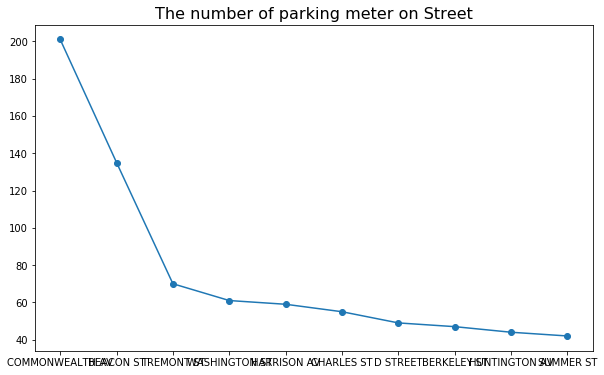

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(rst.index, rst.values, marker='o', linestyle='-')
plt.title("The number of parking meter on Street", fontsize=16)

2. Develop an interactive bar chart that displays the top ten streets with the highest number of parking meters.

In [7]:
import plotly.express as px
fig = px.bar(x=rst.index, y=rst.values, labels={'x': 'Street', 'y': 'Parking meters'},title='Parking meters')
fig.show()

3. Create a map to show the location of parking meters (25 points)
- The map should focus on Boston area
- The pop-up information show: Street and METER_TYPE

In [11]:
import plotly.graph_objects as go
sample_parkings['text'] = 'STREET:' + sample_parkings['STREET'] + 'METER_TYPE：' + sample_parkings['METER_TYPE']

In [12]:
fig = go.Figure(data=go.Scattergeo(
        lon = sample_parkings['LONGITUDE'],
        lat = sample_parkings['LATITUDE'],
        text = sample_parkings['text'],
        mode = 'markers'))

fig.update_layout(
        title = 'Parking meter',
        geo = dict(
            scope = 'usa',
            center=dict(lat=42.3601, lon=-71.0589),
            projection_scale=80
        ),
        width=1000,  # Set figure width
        height=600   # Set figure height
    )
fig.show()